# Sequential Testing (SPRT)

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Define SPRT

https://en.wikipedia.org/wiki/Likelihood-ratio_test

The <font color='blue'><b><mark>Sequential Probability Ratio Test (SPRT)</mark></b></font> is a statistical hypothesis test that evaluates evidence in a sequential manner. At each stage of data collection, it compares the likelihood of two hypotheses (null hypothesis H0​ and alternative hypothesis H1​) and makes a decision whether to continue sampling or stop and reject/accept one of the hypotheses.

<font color='blue'><strong>SPRT Hypotheses:</strong></font><br>
<ul>
    <li><b>Null Hypothesis H0:</b> The treatment (or the parameter) has no effect (or the effect is the same).</li>
    <li><b>Alternative Hypothesis H1:</b> The treatment (or the parameter) has a significant effect (or different effect).</li>
</ul>

<font color='blue'><strong>SPRT Formula Overview:</strong></font>
The SPRT uses a <b>likelihood ratio</b> to compare the two hypotheses. The likelihood ratio is computed by taking the ratio of the likelihood under the alternative hypothesis to the likelihood under the null hypothesis.

At each step n, we calculate the likelihood ratio Λn based on the accumulated data and compare it with two predefined boundaries, A and B:

<ul>
    <li><b>Reject H0:</b> if Λn > A (evidence strongly favors H1).</li>
    <li><b>Accept H0:</b> if Λn < B (evidence strongly supports H0).</li>
    <li><b>Continue Sampling:</b> if B ≤ Λn ≤ A.</li>
</ul>

<font color='blue'><strong>Boundaries A and B</strong></font>
The boundaries A and B are related to the desired error rates:

α is the probability of a Type I error (false positive), and β is the probability of a Type II error (false negative).
For example:

A=(1−α)/β<br>
B=α/(1−β)

These boundaries determine the critical value for the likelihood ratio at which the test will stop in favor of either hypothesis.

### <font color='Blue'>Define SPRT Function</font>

In [2]:
# Function to perform Sequential Probability Ratio Test (SPRT)
def sprt_test(successes_A, trials_A, successes_B, trials_B, A, B):
    p_hat_A = successes_A / trials_A  # Proportion of successes for A
    p_hat_B = successes_B / trials_B  # Proportion of successes for B

    # Likelihood ratio calculation (L)
    likelihood_ratio = (p_hat_B / p_hat_A) ** successes_B * ((1 - p_hat_B) / (1 - p_hat_A)) ** (trials_B - successes_B)

    if likelihood_ratio > A:
        return "Reject Null Hypothesis: B is better"
    elif likelihood_ratio < B:
        return "Accept Null Hypothesis: No difference"
    else:
        return "Continue Testing"


### <font color='Blue'>Define SPRT Parameters & SPRT Boundaries</font>

In [3]:


# Set the parameters
p_A = 0.5  # Success rate for A (null hypothesis)
p_B = 0.6  # Success rate for B (alternative hypothesis)
alpha = 0.05  # Type I error rate
beta = 0.1   # Type II error rate

# Calculate the SPRT boundaries based on alpha and beta
# These are the likelihood ratio thresholds for stopping
A = (1 - alpha) / beta
B = alpha / (1 - beta)


### <font color='Blue'>Simulate the data</font>

In [4]:

# Simulate the data
np.random.seed(42)
num_trials = 200  # Total trials (for illustration)
max_trials_per_stage = 10  # Number of trials per stage before testing
successes_A = 0  # Success count for A
successes_B = 0  # Success count for B


### <font color='Blue'>Initialize results storage for plotting</font>

In [5]:
# Initialize results storage for plotting
results = []

# Sequential testing loop
for trials in range(1, num_trials + 1, max_trials_per_stage):
    # Simulate the outcome for the next batch of trials
    batch_A = np.random.binomial(max_trials_per_stage, p_A)  # Simulate successes in A
    batch_B = np.random.binomial(max_trials_per_stage, p_B)  # Simulate successes in B
    
    successes_A += batch_A
    successes_B += batch_B
    
    # Run the SPRT after each stage of data collection
    decision = sprt_test(successes_A, trials, successes_B, trials, A, B)
    
    # Save results for plotting
    results.append({
        'trials': trials,
        'successes_A': successes_A,
        'successes_B': successes_B,
        'decision': decision
    })
    
    # If a decision is made, stop the test
    if "Reject" in decision or "Accept" in decision:
        break

# Convert results to a structured format
results_df = pd.DataFrame(results)


### <font color='Blue'>Plot the sequential test results</font>

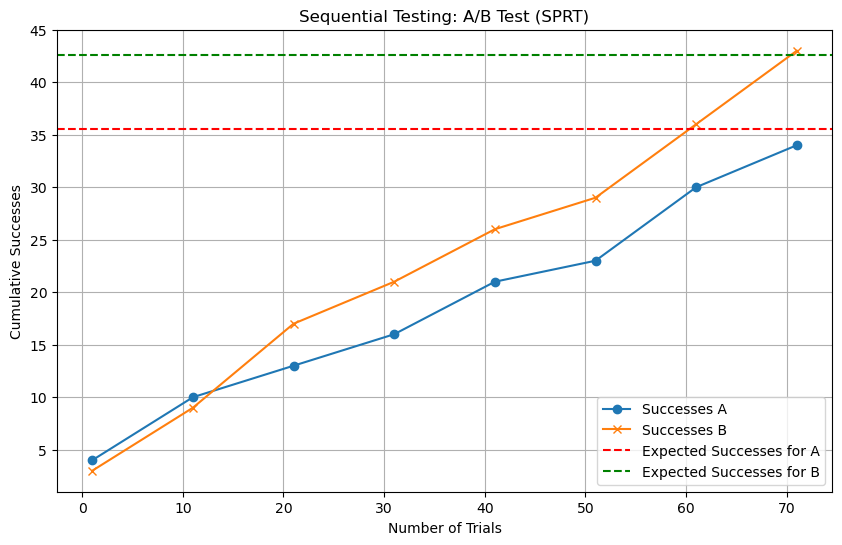

Final Decision: Reject Null Hypothesis: B is better


In [6]:
# Plot the sequential test results
plt.figure(figsize=(10, 6))
plt.plot(results_df['trials'], results_df['successes_A'], label='Successes A', marker='o')
plt.plot(results_df['trials'], results_df['successes_B'], label='Successes B', marker='x')
plt.axhline(y=0.5 * results_df['trials'].max(), color='r', linestyle='--', label='Expected Successes for A')
plt.axhline(y=0.6 * results_df['trials'].max(), color='g', linestyle='--', label='Expected Successes for B')
plt.xlabel('Number of Trials')
plt.ylabel('Cumulative Successes')
plt.title('Sequential Testing: A/B Test (SPRT)')
plt.legend()
plt.grid(True)
plt.show()

# Print the final decision
print(f"Final Decision: {results_df.iloc[-1]['decision']}")
